In [1]:
# The below code is a simple example of how to use python to do predictive modeling on customer churn data.
# We will use the pandas library to load the data and the scikit-learn library to build the model.
# The data is from the IBM Watson customer churn dataset.
# The model I use for this code is a logistic regression, decision tree, support vector machine, and xgboost.
# I also show how to hypertune the model using grid search. But I would recommend using cross-validation for this, which I also show here.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# I stored in on my local machine and loaded it using pandas.
# I also uploaded it to the repository.
# Load the dataset
data = pd.read_csv('/Users/zach/Documents/GitHub/predictive-modeling/customer-churn-prediction/data/telco.csv')


#take a look at the data
data.head()

#set seed for reproducibility
np.random.seed(42)


In [3]:
#Drop Customer ID, Country, and State columns as they are not necessary for the model
data.drop(['Customer ID', 'Country', 'State', 'Quarter'], axis=1, inplace=True)

In [4]:
#check for missing values
data.isnull().sum()

Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                     

In [5]:
#Because the missing values in the categorical columns of Offer, Internet Type, are missing at random, we can use the mode to fill in the missing values.
# Fill in the missing values
data['Offer'].fillna(data['Offer'].mode()[0], inplace=True)
data['Internet Type'].fillna(data['Internet Type'].mode()[0], inplace=True)

#Because the missing values in Churn Category and Churn Reason are not missing at random, 
# but are missing due to customers actually staying with the company, 
# we can fill in the missing values with 'No Churn' and 'No Reason' respectively.
# Fill in the missing values
data['Churn Category'].fillna('No Churn', inplace=True)
data['Churn Reason'].fillna('No Reason', inplace=True)

# Check the first few lines in the offer category
data['Offer'].head()



0    Offer B
1    Offer E
2    Offer D
3    Offer C
4    Offer C
Name: Offer, dtype: object

In [6]:
# Encode categorical variables
# Initialize LabelEncoder
le = LabelEncoder()

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Customer Status')  # Exclude target variable

# Encode binary categorical variables with LabelEncoder
binary_cols = [col for col in categorical_cols if data[col].nunique() == 2]
for col in binary_cols:
    data[col] = le.fit_transform(data[col])

# One-Hot Encode non-binary categorical variables
multi_cols = [col for col in categorical_cols if data[col].nunique() > 2]
data = pd.get_dummies(data, columns=multi_cols, drop_first=True)

# Encode the target variable
# Assuming 'Customer Status' has values like 'Churned', 'Joined', 'Stayed'
target_le = LabelEncoder()
data['Customer Status'] = target_le.fit_transform(data['Customer Status'])

# Verify encoding
print(data['Customer Status'].unique())
print(target_le.classes_)

# Split data into features and labels
X = data.drop('Customer Status', axis=1)
y = data['Customer Status']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

[0 2 1]
['Churned' 'Joined' 'Stayed']


In [7]:
# Split data into features and labels
X = data.drop('Customer Status', axis=1)
y = data['Customer Status']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Exploratory Data analysis

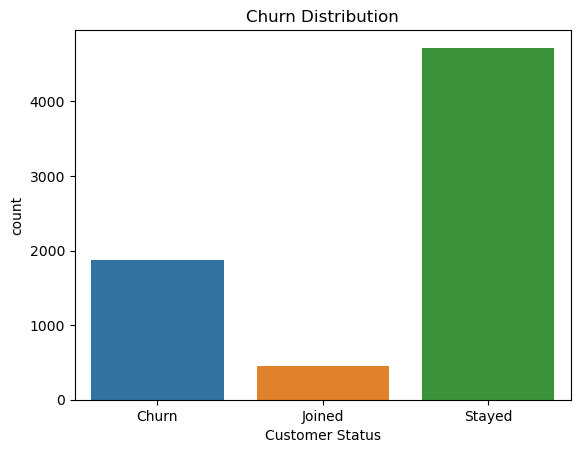

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Visualize churn distribution, with Customer Status as the x-axis
# add the labels of 0 being 'Churn' and 1 being 'Joined' and 2 as 'Stayed'
sns.countplot(x='Customer Status', data=data)
plt.xticks(ticks=[0, 1, 2], labels=['Churn', 'Joined', 'Stayed'])
plt.title('Churn Distribution')
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Initialize models
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
svc = SVC(probability=True)
xgboost = XGBClassifier()

# Train models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
svc.fit(X_train, y_train)
xgboost.fit(X_train, y_train)


/Users/zach/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

--- Logistic Regression ---
Accuracy: 0.9532
Precision: 0.9532
Recall: 0.9532
F1 Score: 0.9532
ROC AUC: 0.9881939643578894
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       400
           1       0.68      0.68      0.68       101
           2       0.96      0.96      0.96       908

    accuracy                           0.95      1409
   macro avg       0.88      0.88      0.88      1409
weighted avg       0.95      0.95      0.95      1409



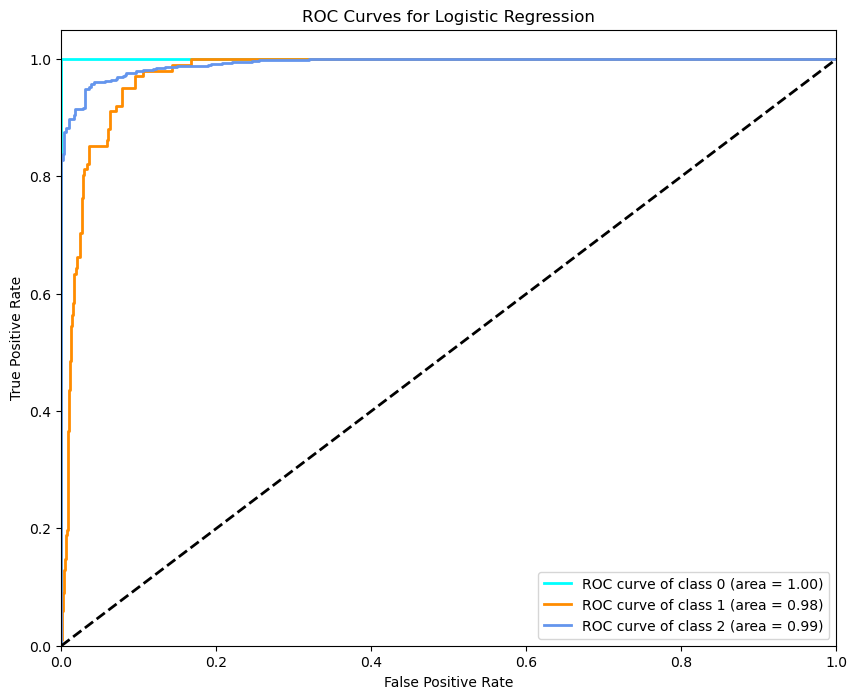

--- Decision Tree ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00       908

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



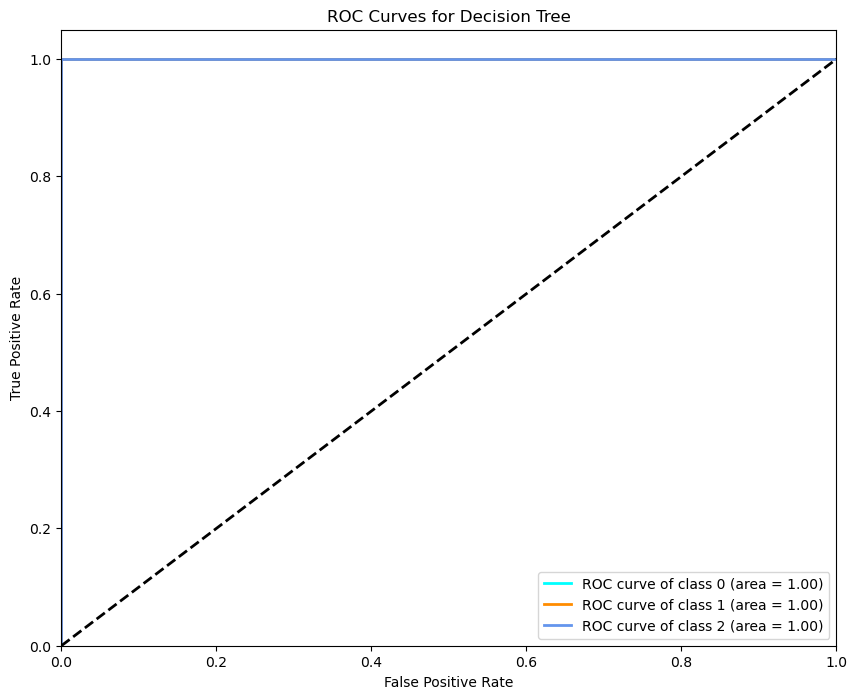

--- Support Vector Machine ---
Accuracy: 0.8517
Precision: 0.7977
Recall: 0.8517
F1 Score: 0.8215
ROC AUC: 0.9150766154533955
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       400
           1       0.00      0.00      0.00       101
           2       0.84      0.96      0.90       908

    accuracy                           0.85      1409
   macro avg       0.58      0.59      0.58      1409
weighted avg       0.80      0.85      0.82      1409



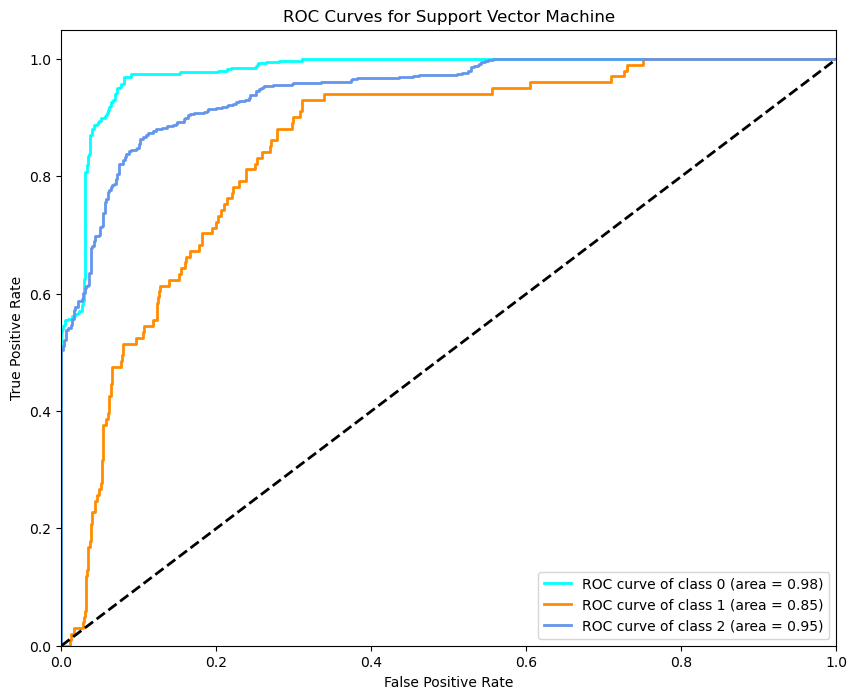

--- XGBoost ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00       908

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



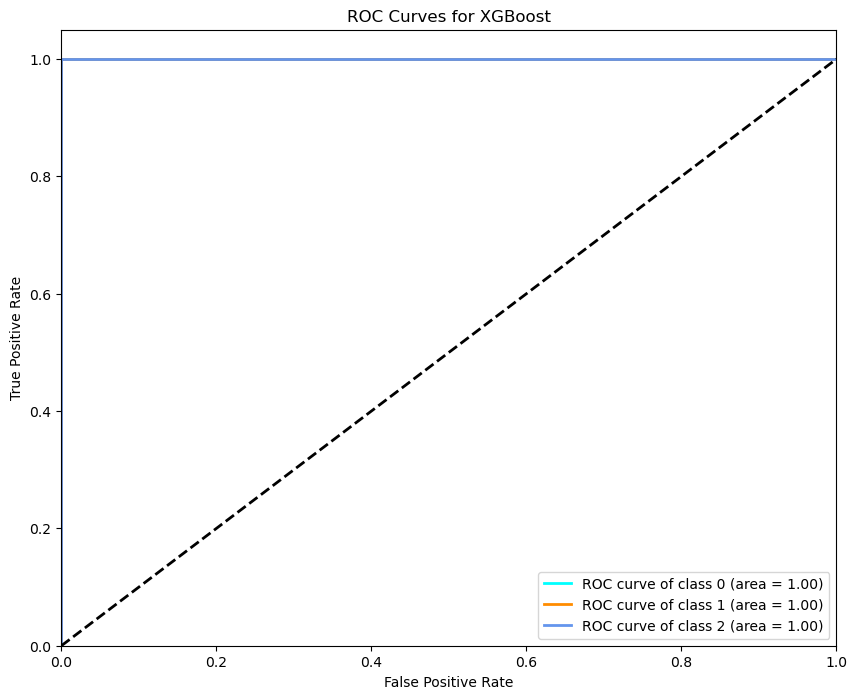

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Define a function for evaluating the models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)
    else:
        # For models like SVM without predict_proba by default
        y_pred_prob = model.decision_function(X_test)
        # Convert decision scores to probabilities
        from sklearn.preprocessing import MinMaxScaler
        scaler_prob = MinMaxScaler()
        y_pred_prob = scaler_prob.fit_transform(y_pred_prob)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # For ROC-AUC in multi-class, use 'macro' average
    try:
        roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovo', average='macro')
    except:
        roc_auc = 'N/A'
    
    print(f'--- {model_name} ---')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC: {roc_auc}')
    print(classification_report(y_test, y_pred))
    
    # Plot ROC Curve for multi-class
    if isinstance(roc_auc, float):
        from sklearn.preprocessing import label_binarize
        from sklearn.metrics import roc_curve, auc
        from sklearn.multiclass import OneVsRestClassifier
        from sklearn.preprocessing import label_binarize
        n_classes = len(np.unique(y_test))
        y_test_binarized = label_binarize(y_test, classes=range(n_classes))
        if y_pred_prob.ndim == 1:
            y_pred_prob = y_pred_prob.reshape(-1, 1)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curves for each class
        plt.figure(figsize=(10, 8))
        colors = ['aqua', 'darkorange', 'cornflowerblue']
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curves for {model_name}')
        plt.legend(loc="lower right")
        plt.show()

# Evaluate models
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
evaluate_model(decision_tree, X_test, y_test, "Decision Tree")
evaluate_model(svc, X_test, y_test, "Support Vector Machine")
evaluate_model(xgboost, X_test, y_test, "XGBoost")


# Hypertuning
-------------

We can hypertune the model. Although, I would recommend against it as we only have data from the Third Quarter and some of our models may already be overfit to the data. But here is one way of going about hypertuning. Let's do it on our xgboost model.


Fitting 3 folds for each of 18 candidates, totalling 54 fits


/Users/zach/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:24:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/zach/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:24:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/zach/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:24:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/zach/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:24:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/zach/

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation accuracy: 1.0000
--- XGBoost (Tuned) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00       908

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



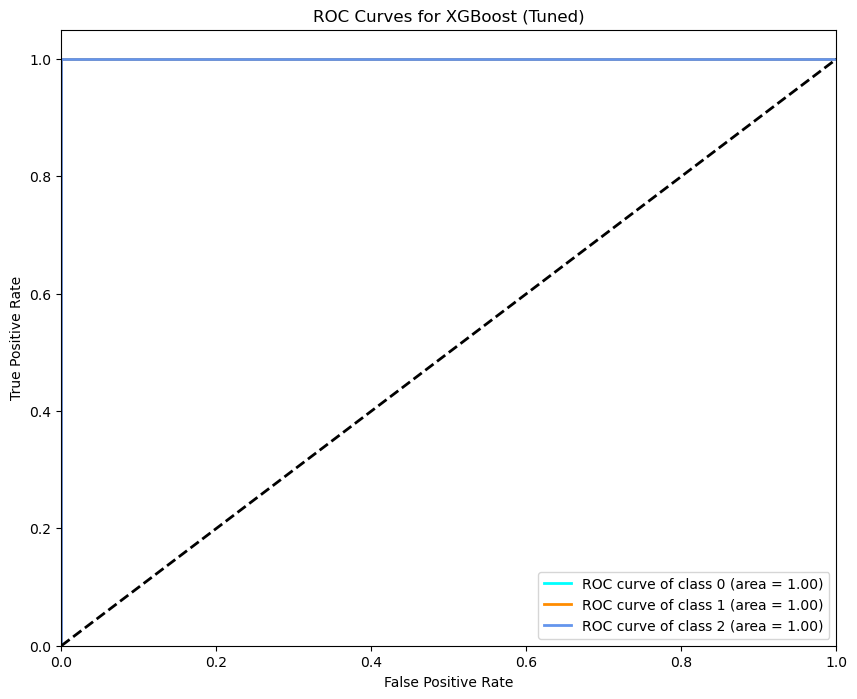

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Use the best estimator for evaluation
best_xgboost = grid_search.best_estimator_
evaluate_model(best_xgboost, X_test, y_test, "XGBoost (Tuned)")


# Cross Validation
-----------------

Cross Validation is more likely something that we would want to do. It isn't that diffi

In [12]:
from sklearn.model_selection import cross_val_score

#cross validate our models
scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores for log_reg: {scores}')
print(f'Average CV Accuracy for log_reg: {scores.mean():.4f}')
scores1 = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores for decision_tree: {scores1}')
print(f'Average CV Accuracy for decision_tree: {scores1.mean():.4f}')
scores2 = cross_val_score(xgboost, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores for xgboost: {scores2}')
print(f'Average CV Accuracy for xgboost: {scores2.mean():.4f}')


/Users/zach/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zach/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Cross-Validation Accuracy Scores for log_reg: [0.95474712 0.96362023 0.95829636 0.95474712 0.96003552]
Average CV Accuracy for log_reg: 0.9583
Cross-Validation Accuracy Scores for decision_tree: [1. 1. 1. 1. 1.]
Average CV Accuracy for decision_tree: 1.0000
Cross-Validation Accuracy Scores for xgboost: [1. 1. 1. 1. 1.]
Average CV Accuracy for xgboost: 1.0000
